<a href="https://www.kaggle.com/code/klaidenx/earthquakes?scriptVersionId=158977292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import plotly.express as px

# 📚 Reading Data

## *In this section, we will read the dataset into our notebook.*

In [2]:
def read_path(path: str)->pd.DataFrame:
    
    for _,dirname,filename in os.walk(path):
        for file in filename:
            data=os.path.join(_,file)
            data=pd.read_csv(data)
    return data

In [3]:
earthquakes_data=read_path("/kaggle/input/")
earthquakes_data.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [4]:
earthquakes_data.describe().T.style.background_gradient(cmap='viridis',subset=['count'\
                                                                               ,'max'\
                                                                               ,'mean'\
                                                                               ,'min'])

,count,mean,std,min,25%,50%,75%,max
latitude,26642.000000,16.852798,30.389200,-65.849700,-6.415275,18.884167,41.827950,86.593900
longitude,26642.000000,-11.487497,130.053399,-179.998700,-149.608650,-64.811833,126.965100,179.999400
depth,26642.000000,67.491224,116.762456,-3.370000,10.000000,21.998000,66.833000,681.238000
mag,26642.000000,4.007395,0.794423,2.600000,3.220000,4.300000,4.500000,7.800000
nst,25227.000000,42.571332,37.662352,0.000000,19.000000,30.000000,52.000000,423.000000
gap,25225.000000,124.930971,67.430145,8.000000,73.000000,111.000000,165.000000,350.000000
dmin,24776.000000,2.692908,4.043568,0.000000,0.612000,1.579000,3.172000,50.820000
rms,26642.000000,0.581575,0.256276,0.010000,0.410000,0.590000,0.750000,1.880000
horizontalError,25093.000000,7.017267,4.072365,0.000000,4.140000,7.060000,9.730000,99.000000
depthError,26642.000000,4.475056,4.451649,0.000000,1.848000,2.019000,6.669000,60.670000


In [5]:
earthquakes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

# 🧹 Data Analysis and Cleaning

## *In this section, we will explore and clean the dataset to prepare it for analysis.*

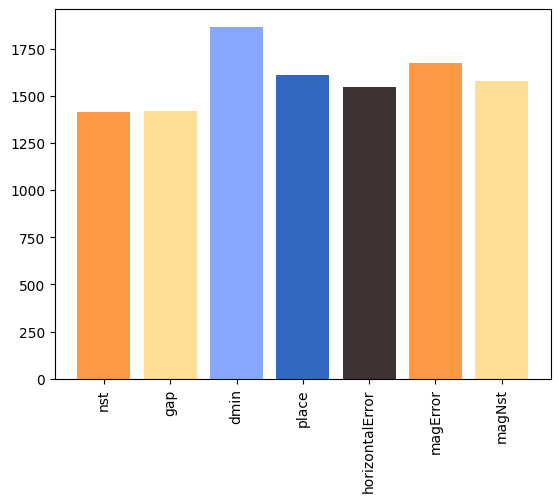

Missing Data left Count Is 0


In [6]:
missing_data={
    "Names":list(earthquakes_data[earthquakes_data.columns[earthquakes_data.isnull().sum()>1]].columns),
    "Values":[i for i in np.array(earthquakes_data.isnull().sum()) if i > 0]
}
bar_colors = ['#FF9843', '#FFDD95', '#86A7FC', '#3468C0','#3E3232']

plt.bar(missing_data["Names"],missing_data["Values"],color=bar_colors)
plt.xticks(rotation=90)
plt.show()

#
earthquakes_data[missing_data["Names"]] = earthquakes_data[missing_data["Names"]].apply(lambda x: x.fillna(x.median()) if x.dtype!="object" else "Nothing to drop")
print("Missing Data left Count Is {}".format(earthquakes_data.isnull().sum().sum()))

In [7]:
categorical_data=earthquakes_data.select_dtypes(exclude="float64")
earthquakes_data.drop(columns=["id","place","status"],inplace=True)

print(categorical_data.columns)

Index(['time', 'magType', 'net', 'id', 'updated', 'place', 'type', 'status',
       'locationSource', 'magSource'],
      dtype='object')


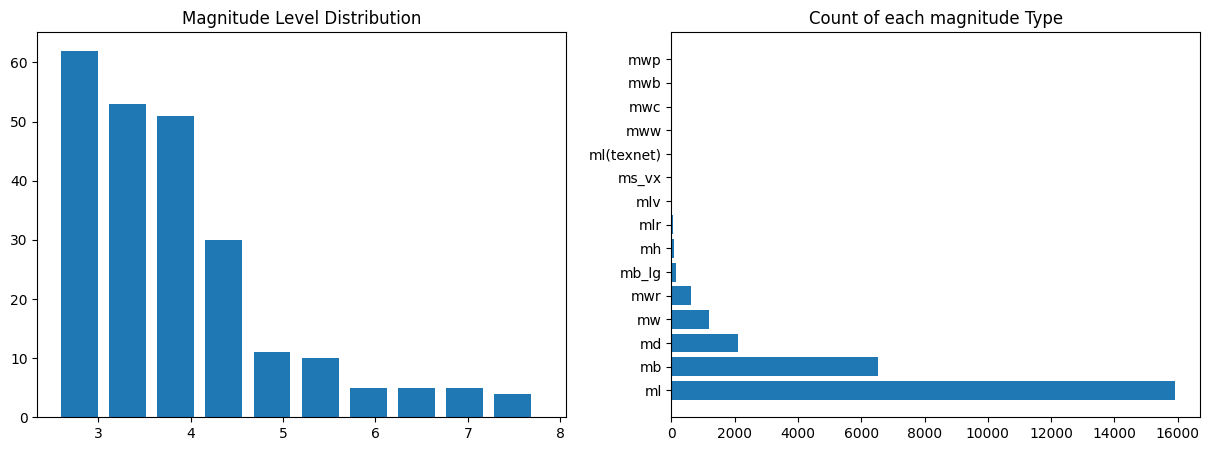

In [8]:
magnitude_types=earthquakes_data["magType"].unique()
magnitude=earthquakes_data["mag"].unique()

fig,axs=plt.subplots(1,2,figsize=(15,5))
axs[0].hist(magnitude,width=.4)
axs[0].set_title("Magnitude Level Distribution")

axs[1].barh(magnitude_types,earthquakes_data["magType"].value_counts())
axs[1].set_title("Count of each magnitude Type")
plt.show()

In [9]:
coords=earthquakes_data[["latitude","longitude"]]
fig=px.scatter_mapbox(coords,lat="latitude",lon="longitude")
fig.update_layout(mapbox_style="open-street-map")